# 1. What is regularization in the context of deep learningH Why is it important?

# 2 Explain the bias-variance tradeoff and how regularization helps in addressing this tradeoff?

# 3. Describe the concept of =1 and =2 regularization. How do they differ in terms of penalty calculation and their effects on the model?

# 4. Discuss the role of regularization in preventing overfitting and improving the generalization of deep learning models.

# 5 Explain Dropout regularization and how it works to reduce overfitting. Discuss the impact of Dropout on model training and inference?

# 6. Describe the concept of Early stopping as a form of regularization. How does it help prevent overfitting during the training process?

# 7. Explain the concept of Batch Normalization and its role as a form of regularization. How does Batch Normalization help in preventing overfitting?

# 8.  Implement Dropout regularization in a deep learning model using a framework of your choice. Evaluate its impact on model performance and compare it with a model without Dropout?

In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

early=EarlyStopping(monitor='val_loss',patience=3)

In [16]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


In [18]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [43]:
def create_model_without_dropout():
    model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_without_dropout = create_model_without_dropout()


C:\Users\www58\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
def create_model_with_dropout():
    model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model_with_dropout = create_model_with_dropout()


In [54]:
history_without_dropout = model_without_dropout.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1,callbacks=[early])

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9864 - loss: 0.0459 - val_accuracy: 0.9751 - val_loss: 0.0833
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9895 - loss: 0.0348 - val_accuracy: 0.9783 - val_loss: 0.0782
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9924 - loss: 0.0251 - val_accuracy: 0.9735 - val_loss: 0.0888
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9943 - loss: 0.0196 - val_accuracy: 0.9750 - val_loss: 0.0905
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9948 - loss: 0.0168 - val_accuracy: 0.9762 - val_loss: 0.0931


In [56]:
history_with_dropout = model_with_dropout.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1,callbacks=[early])

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8379 - loss: 0.5762 - val_accuracy: 0.9551 - val_loss: 0.1593
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9629 - loss: 0.1279 - val_accuracy: 0.9668 - val_loss: 0.1107
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9767 - loss: 0.0791 - val_accuracy: 0.9678 - val_loss: 0.1083


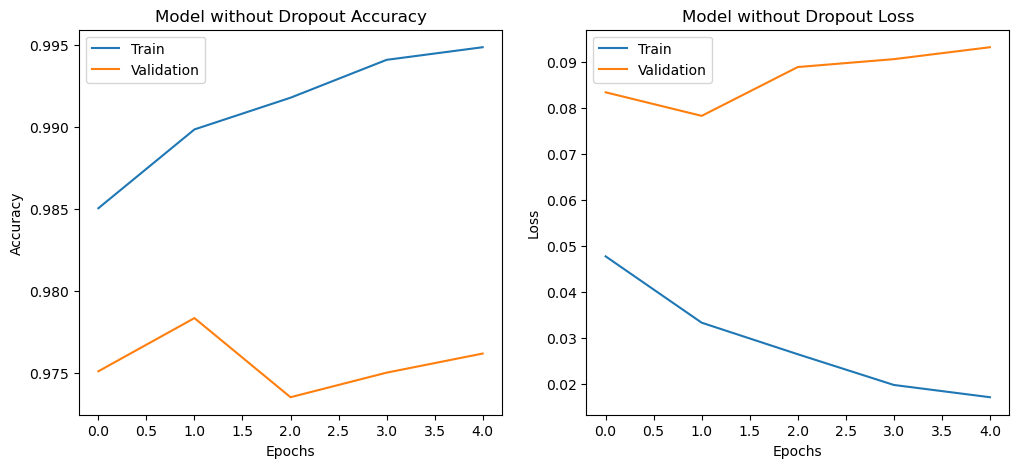

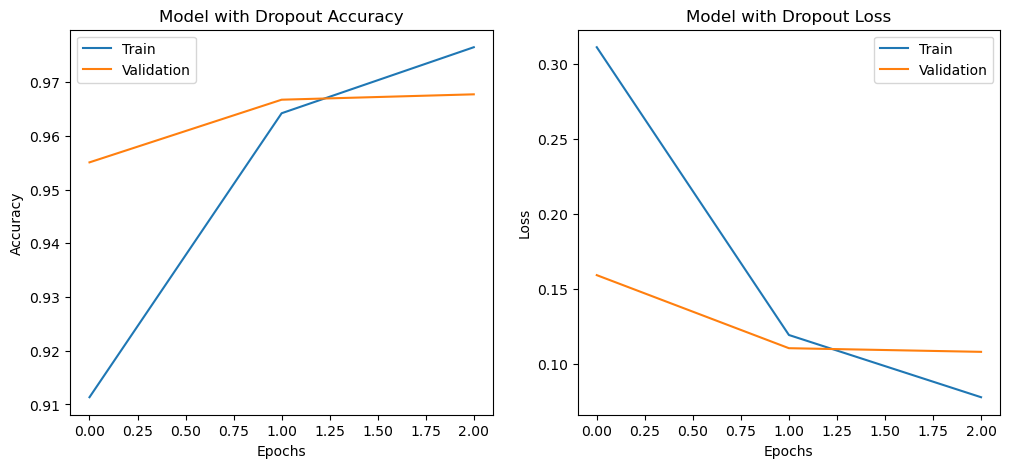

In [58]:
def plot_history(history, title):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'{title} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

# Plot the history for models without and with Dropout
plot_history(history_without_dropout, 'Model without Dropout')
plot_history(history_with_dropout, 'Model with Dropout')


In [60]:
test_loss_without_dropout, test_acc_without_dropout = model_without_dropout.evaluate(X_test, y_test, verbose=0)
test_loss_with_dropout, test_acc_with_dropout = model_with_dropout.evaluate(X_test, y_test, verbose=0)

print(f'Test accuracy without Dropout: {test_acc_without_dropout}')
print(f'Test accuracy with Dropout: {test_acc_with_dropout}')

Test accuracy without Dropout: 0.9769999980926514
Test accuracy with Dropout: 0.9710999727249146


# 9. Discuss the considerations and tradeoffs when choosing the appropriate regularization technique for a given deep learning task.